In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

sns.set(style='darkgrid')
plt.rcParams['font.family'] = 'SimHei'
plt.rcParams['axes.unicode_minus'] = False
warnings.filterwarnings('once')

# 假设检验概述

## 区间估计

In [9]:
a = np.array([0.497, 0.518, 0.506, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])
#总体的均值与标准差
mean, std = 0.5, 0.015
#计算样本均值
sample_mean = a.mean()
#计算标准误差
se = std / np.sqrt(len(a))
#计算置信区间
left, right = sample_mean - 1.96 * se, sample_mean + 1.96 * se
print(f"置信区间：({left:.3f},{right:.3f})")

置信区间：(0.501,0.521)


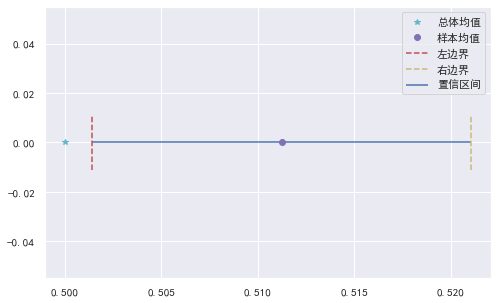

In [34]:
#将计算结果可视化
plt.figure(figsize=(8, 5))
plt.plot(mean, 0, 'c*', label="总体均值")
plt.plot(sample_mean, 0, 'mo', label="样本均值")
plt.hlines(0, xmin=left, xmax=right, colors='b', label="置信区间")
plt.axvline(left, 0.4, 0.6, color="r", ls='--', label="左边界")
plt.axvline(right, 0.4, 0.6, color="y", ls='--', label="右边界")
plt.legend(loc=1)

# Z检验
适用情况：
- 总体呈正态分布
- 总体方差已知
- 样本容量较大（一般 > 30 ）

In [37]:
from sklearn.datasets import load_iris

In [44]:
iris = load_iris()
data = np.concatenate([iris.data, iris.target.reshape(-1, 1)], axis=1)

In [46]:
data = pd.DataFrame(data,
                    columns=[
                        "sepal_length", "sepal_width", "petal_length",
                        "petal_width", "type"
                    ])

In [ ]:
iris

In [48]:
print(data["petal_length"].mean())

3.7580000000000027


In [3]:
from scipy import stats

a = np.array([0.497, 0.518, 0.506, 0.524, 0.498, 0.511, 0.520, 0.515, 0.512])
#总体的均值与标准差
mean, std = 0.5, 0.015
#计算样本均值
sample_mean = a.mean()
#计算标准误差
se = std / np.sqrt(len(a))

#计算Z统计量
Z = (sample_mean - mean) / se
print("统计量Z：", Z)
#计算P值
P = 2 * stats.norm.sf(abs(Z))
print("P-Value值：", P)

统计量Z： 2.244444444444471
P-Value值： 0.02480381963225589


# T检验
适用情况：
- 总体呈正态分布
- 总体方差未知
- 样本数量较少（一般 < 30 ）

In [10]:
from sklearn.datasets import load_iris

iris = load_iris()
data = pd.DataFrame(
    iris.data,
    columns=["sepal_length", "sepal_width", "petal_length", "petal_width"])

#计算样本均值
mean = data["petal_length"].mean()
#计算样本方差
std = data["petal_length"].std()
print("样本均值:", mean)
print("样本方差：", std)

#计算T统计量
t = (mean - 3.5) / (std / np.sqrt(len(data["petal_length"])))
print("t统计量：", t)
#计算P值
#df:自由度，即自变量可以自由取值的个数
P = 2 * stats.t.sf(abs(t), df=len(data["petal_length"]) - 1)
print("P-Value值：", P)

样本均值: 3.7580000000000027
样本方差： 1.7652982332594667
t统计量： 1.7899761687043467
P-Value值： 0.07548856490783468


In [11]:
stats.ttest_1samp?

In [13]:
stats.ttest_1samp(data["petal_length"],3.5)

Ttest_1sampResult(statistic=1.7899761687043318, pvalue=0.07548856490783705)

In [14]:
stats?

# 双边假设与单边假设：注意P值的不同

# 作业

In [19]:
# 2、某公司要求，平均日投诉量均值不得超过1%。
#现检查一个部门得服务情况。在该部门维护的一个500人客户群中，
#近七天的投诉量分别为5，6，8，4，4，7，0，请问该部门是否达标

#1、设定投诉事件总体服从正态分布

a = np.array([5, 6, 8, 4, 4, 7, 0]) / 500

# 总体均值：
mean = 0.01
#样本均值：
sample_mean = a.mean()
#样本标准差：
sample_std = a.std()
#标准误差：
se = sample_std / np.sqrt(len(a))

#计算t统计量
t = (mean - sample_mean) / se
print("t:", t)

#计算P值
P = stats.t.cdf(t, df=len(a) - 1)
print("P-Value:", P)

t: 0.15644655469368554
P-Value: 0.5595938210714404


In [21]:
sample_mean

0.009714285714285715